In [2]:
!pip install pandas numpy scikit-learn --quiet

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
import os
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [6]:
data_df = pd.read_csv('weather.csv')

In [7]:
data_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
data_df.dropna(subset=['RainTomorrow'], inplace = True)

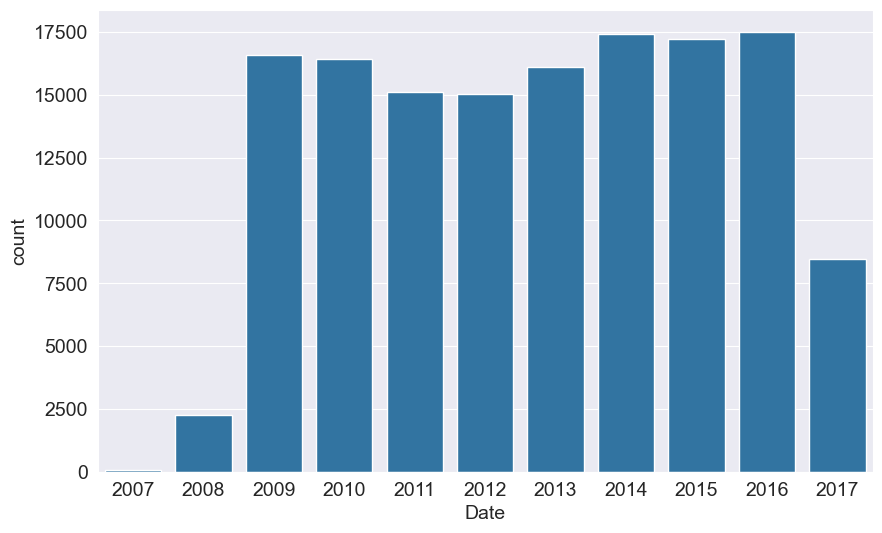

In [10]:
sns.countplot(x=pd.to_datetime(data_df['Date']).dt.year);

In [18]:
 year = pd.to_datetime(data_df.Date).dt.year

In [20]:
year

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
145454    2017
145455    2017
145456    2017
145457    2017
145458    2017
Name: Date, Length: 142193, dtype: int32

In [22]:
train_df = data_df[year < 2015]
val_df = data_df[year == 2015]
test_df = data_df[year > 2015]

In [24]:
print('train_df.shape: ',train_df.shape)
print('val_df.shape: ',val_df.shape)
print('test_df.shape: ',test_df.shape)

train_df.shape:  (98988, 23)
val_df.shape:  (17231, 23)
test_df.shape:  (25974, 23)


In [26]:
inputs_cols = list(train_df.columns)[1:-1]
target_cols = 'RainTomorrow'

In [28]:
inputs_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [30]:
train_inputs = train_df[inputs_cols].copy()
train_target = train_df[target_cols].copy()

In [32]:
val_inputs = val_df[inputs_cols].copy()
val_target = val_df[target_cols].copy()

In [34]:
test_inputs = test_df[inputs_cols].copy()
test_target = test_df[target_cols].copy()

In [36]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()

In [38]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [40]:
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [42]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [44]:
from sklearn.impute import SimpleImputer

In [45]:
imputer = SimpleImputer(strategy='mean').fit(data_df[numeric_cols])

In [48]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [50]:
train_target.isna().sum()

0

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler().fit(data_df[numeric_cols])

In [56]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
train_inputs[categorical_cols] = train_inputs[categorical_cols].fillna('Unknown')
val_inputs[categorical_cols] = val_inputs[categorical_cols].fillna('Unknown')
test_inputs[categorical_cols] = test_inputs[categorical_cols].fillna('Unknown')

In [74]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(data_df[categorical_cols])

In [76]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [78]:
print(len(encoded_cols))

103


In [80]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [82]:
train_inputs[encoded_cols]

Location_Adelaide  Location_Albany  Location_Albury  \
0                     0.0              0.0              1.0   
1                     0.0              0.0              1.0   
2                     0.0              0.0              1.0   
3                     0.0              0.0              1.0   
4                     0.0              0.0              1.0   
...                   ...              ...              ...   
144548                0.0              0.0              0.0   
144549                0.0              0.0              0.0   
144550                0.0              0.0              0.0   
144551                0.0              0.0              0.0   
144552                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
0                         0.0                     0.0                0.0   
1                         0.0                     0.0                0.0   
2                         0.0                     0.0                0.0   
3                         0.0                     0.0                0.0   
4                         0.0                     0.0                0.0   
...                       ...                     ...                ...   
144548                    0.0                     0.0                0.0   
144549                    0.0                     0.0                0.0   
144550                    0.0                     0.0                0.0   
144551                    0.0                     0.0                0.0   
144552                    0.0                     0.0                0.0   

        Location_Bendigo  Location_Brisbane  Location_Cairns  \
0                    0.0                0.0              0.0   
1                    0.0                0.0              0.0   
2                    0.0                0.0              0.0   
3                    0.0                0.0              0.0   
4                    0.0                0.0              0.0   
...                  ...                ...              ...   
144548               0.0                0.0              0.0   
144549               0.0                0.0              0.0   
144550               0.0                0.0              0.0   
144551               0.0                0.0              0.0   
144552               0.0                0.0              0.0   

        Location_Canberra  Location_Cobar  Location_CoffsHarbour  \
0                     0.0             0.0                    0.0   
1                     0.0             0.0                    0.0   
2                     0.0             0.0                    0.0   
3                     0.0             0.0                    0.0   
4                     0.0             0.0                    0.0   
...                   ...             ...                    ...   
144548                0.0             0.0                    0.0   
144549                0.0             0.0                    0.0   
144550                0.0             0.0                    0.0   
144551                0.0             0.0                    0.0   
144552                0.0             0.0                    0.0   

        Location_Dartmoor  Location_Darwin  Location_GoldCoast  \
0                     0.0              0.0                 0.0   
1                     0.0              0.0                 0.0   
2                     0.0              0.0                 0.0   
3                     0.0              0.0                 0.0   
4                     0.0              0.0                 0.0   
...                   ...              ...                 ...   
144548                0.0              0.0                 0.0   
144549                0.0              0.0                 0.0   
144550                0.0              0.0                 0.0   
144551                0.0              0.0                 0.0   
144552                0.0 

In [84]:
X_train = train_inputs[numeric_cols + encoded_cols]

In [86]:
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
model = DecisionTreeClassifier(random_state = 42)

In [92]:
%%time
model.fit(X_train,train_target)

CPU times: total: 2.33 s
Wall time: 2.73 s


DecisionTreeClassifier(random_state=42)

In [94]:
train_preds = model.predict(X_train)

In [96]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [98]:
pd.Series(train_preds).value_counts()

No     76707
Yes    22281
Name: count, dtype: int64

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [102]:
accuracy_score(train_preds,train_target)

0.9999797955307714

In [104]:
train_probs = model.predict_proba(X_train)

In [106]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [108]:
model.score(X_val,val_target)

0.791654576054785

In [110]:
 val_target.value_counts()

RainTomorrow
No     13583
Yes     3648
Name: count, dtype: int64

In [112]:
pd.Series(val_target).value_counts()/len(val_target)

RainTomorrow
No     0.788289
Yes    0.211711
Name: count, dtype: float64

In [114]:
from sklearn.tree import plot_tree, export_text

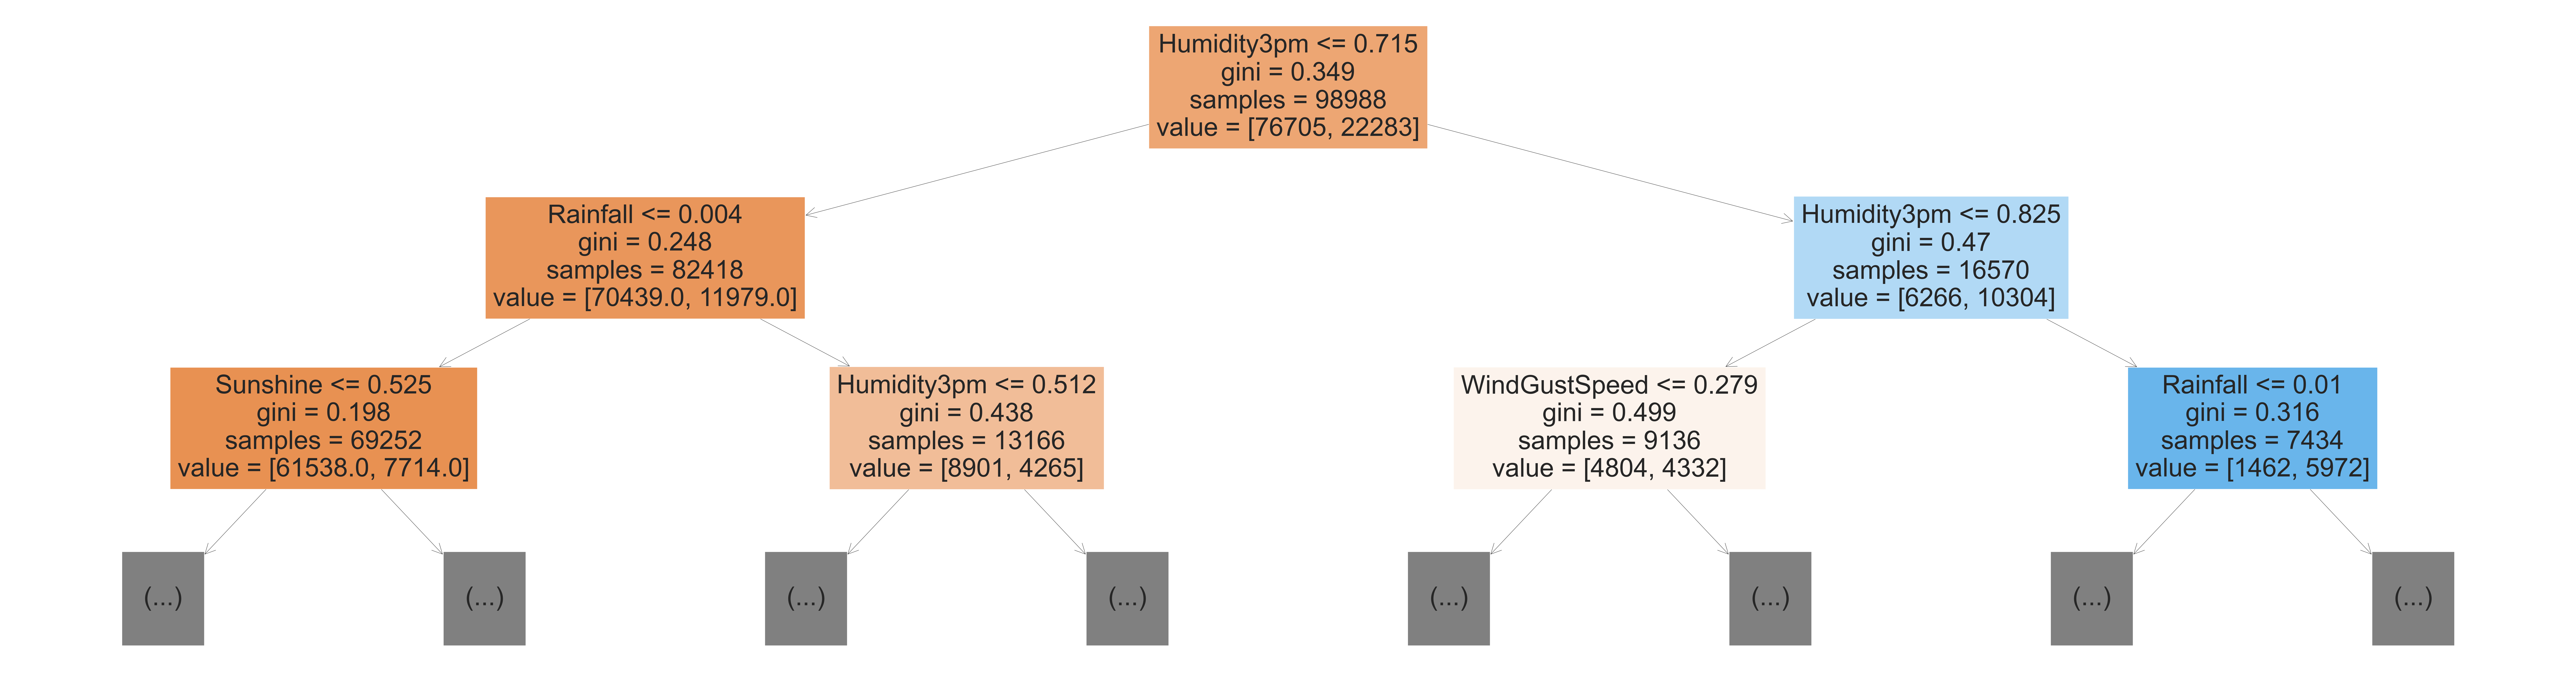

In [116]:
plt.figure(figsize=(150,40))
plot_tree(model,feature_names = X_train.columns, max_depth=2,filled=True);

In [118]:
model.tree_.max_depth

48

In [120]:
model.feature_importances_


array([0.03450243, 0.0326979 , 0.0588707 , 0.02398851, 0.04973483,
       0.05536477, 0.02888049, 0.02916332, 0.03948956, 0.26258596,
       0.03464976, 0.06252979, 0.01335156, 0.01832233, 0.03344341,
       0.03103312, 0.00229202, 0.00242598, 0.00137905, 0.00072507,
       0.00153394, 0.00118986, 0.00076956, 0.0015545 , 0.00107346,
       0.00141115, 0.00107036, 0.00196324, 0.00181935, 0.00034969,
       0.00100552, 0.00155723, 0.00046338, 0.00101511, 0.00169162,
       0.00084242, 0.00105612, 0.00086093, 0.00168535, 0.00187041,
       0.00051907, 0.00047732, 0.00149774, 0.00154991, 0.00137383,
       0.00122996, 0.00074085, 0.00140641, 0.0010652 , 0.0021117 ,
       0.00070719, 0.00175523, 0.00097529, 0.00137448, 0.00116001,
       0.00042945, 0.00151262, 0.00034984, 0.00081469, 0.00148406,
       0.00152123, 0.00148832, 0.00265512, 0.0019318 , 0.00033358,
       0.0014037 , 0.00150786, 0.00207691, 0.00347399, 0.00252085,
       0.00225861, 0.00221304, 0.00333089, 0.00219937, 0.00302

In [122]:
importance_df = pd.DataFrame({
    'feature':X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending = False)

In [124]:
importance_df

feature  importance
9                  Humidity3pm    0.262586
11                 Pressure3pm    0.062530
2                     Rainfall    0.058871
5                WindGustSpeed    0.055365
4                     Sunshine    0.049735
8                  Humidity9am    0.039490
10                 Pressure9am    0.034650
0                      MinTemp    0.034502
14                     Temp9am    0.033443
1                      MaxTemp    0.032698
15                     Temp3pm    0.031033
7                 WindSpeed3pm    0.029163
6                 WindSpeed9am    0.028880
3                  Evaporation    0.023989
13                    Cloud3pm    0.018322
12                    Cloud9am    0.013352
106              WindDir3pm_NW    0.004107
85                WindDir9am_N    0.003647
105             WindDir3pm_NNW    0.003629
102               WindDir3pm_N    0.003600
103              WindDir3pm_NE    0.003571
68               WindGustDir_N    0.003474
72              WindGustDir_NW    0.003331
96              WindDir9am_WNW    0.003226
107               WindDir3pm_S    0.003207
79             WindGustDir_WNW    0.003103
74              WindGustDir_SE    0.003027
109             WindDir3pm_SSE    0.003016
117              RainToday_Yes    0.003007
101             WindDir3pm_ESE    0.002918
100             WindDir3pm_ENE    0.002873
104             WindDir3pm_NNE    0.002831
89               WindDir9am_NW    0.002800
78               WindGustDir_W    0.002782
77              WindGustDir_SW    0.002779
113             WindDir3pm_WNW    0.002733
83              WindDir9am_ENE    0.002698
87              WindDir9am_NNE    0.002664
62        Location_Witchcliffe    0.002655
110             WindDir3pm_SSW    0.002628
75             WindGustDir_SSE    0.002574
69              WindGustDir_NE    0.002521
88              WindDir9am_NNW    0.002472
108              WindDir3pm_SE    0.002432
17             Location_Albany    0.002426
86               WindDir9am_NE    0.002383
112               WindDir3pm_W    0.002376
80             WindGustDir_WSW    0.002328
90                WindDir9am_S    0.002328
91               WindDir9am_SE    0.002324
97              WindDir9am_WSW    0.002317
111              WindDir3pm_SW    0.002315
114             WindDir3pm_WSW    0.002300
16           Location_Adelaide    0.002292
70             WindGustDir_NNE    0.002259
92              WindDir9am_SSE    0.002219
71             WindGustDir_NNW    0.002213
73               WindGustDir_S    0.002199
82                WindDir9am_E    0.002177
95                WindDir9am_W    0.002176
84              WindDir9am_ESE    0.002162
99                WindDir3pm_E    0.002127
49           Location_Portland    0.002112
67             WindGustDir_ESE    0.002077
76             WindGustDir_SSW    0.001997
27       Location_CoffsHarbour    0.001963
94               WindDir9am_SW    0.001959
93              WindDir9am_SSW    0.001942
63         Location_Wollongong    0.001932
39        Location_MountGinini    0.001870
28           Location_Dartmoor    0.001819
51               Location_Sale    0.001755
34          Location_Melbourne    0.001692
38       Location_MountGambier    0.001685
31             Location_Hobart    0.001557
23           Location_Brisbane    0.001554
43      Location_NorfolkIsland    0.001550
20      Location_BadgerysCreek    0.001534
60           Location_Watsonia    0.001521
56        Location_Tuggeranong    0.001513
66             WindGustDir_ENE    0.001508
42          Location_NorahHead    0.001498
61        Location_Williamtown    0.001488
59            Location_Walpole    0.001484
25           Location_Canberra    0.001411
47              Location_Perth    0.001406
65               WindGustDir_E    0.001404
18             Location_Albury    0.001379
53             Location_Sydney    0.001374
44          Location_Nuriootpa    0.001374
45         Location_PearceRAAF    0.001230
21           Location_Ballarat    0.001190
54      Location_SydneyA

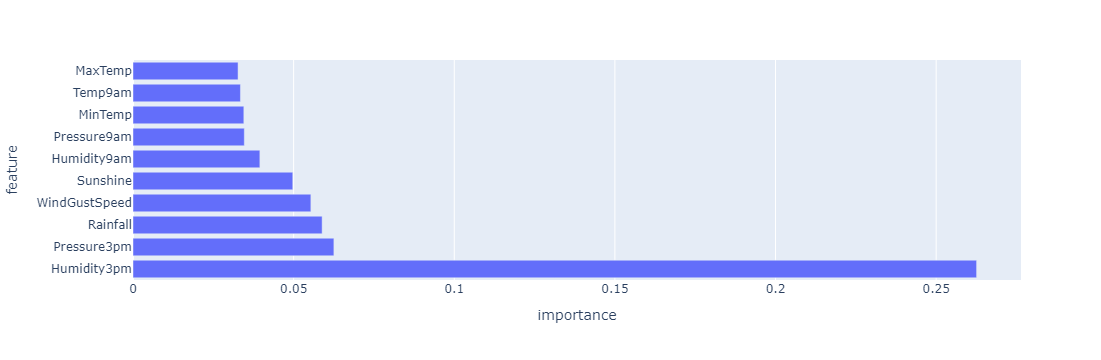

In [126]:
px.bar(importance_df.head(10),x='importance',y='feature')

In [127]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [130]:
model.fit(X_train,train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [131]:
model.score(X_train, train_target)

0.8291308037337859

In [134]:
model.score(X_val,val_target)

0.8334397307178921

In [136]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth = md, random_state = 42)
    model.fit(X_train, train_target)
    train_error = 1 - model.score(X_train, train_target)
    val_error = 1 - model.score(X_val, val_target)
    return {'Max Depth': md, 'Training Error' : train_error, 'validation Error' : val_error}

In [138]:
%%time
error_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

CPU times: total: 28.5 s
Wall time: 38.4 s


In [139]:
error_df

Max Depth  Training Error  validation Error
0           1        0.184315          0.177935
1           2        0.179547          0.172712
2           3        0.170869          0.166560
3           4        0.165707          0.164355
4           5        0.160676          0.159074
5           6        0.156211          0.157275
6           7        0.153231          0.154721
7           8        0.147644          0.157797
8           9        0.140724          0.156346
9          10        0.132703          0.158319
10         11        0.122934          0.158842
11         12        0.113297          0.160989
12         13        0.101861          0.163252
13         14        0.090001          0.167315
14         15        0.079121          0.170913
15         16        0.068311          0.173757
16         17        0.058239          0.175904
17         18        0.048673          0.180140
18         19        0.040126          0.185015
19         20        0.032509          0.188556

In [140]:
model = DecisionTreeClassifier(max_leaf_nodes = 128, random_state = 42)

In [141]:
model.fit(X_train, train_target)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [146]:
model.score(X_train, train_target)

0.8480421869317493

In [148]:
model.score(X_val, val_target)

0.8442342290058615

In [150]:
model.tree_.max_depth

12

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
model = RandomForestClassifier(n_jobs = -1, random_state= 42)

In [156]:
model.fit(X_train, train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [158]:
model.score(X_train,train_target)

0.9999595910615429

In [159]:
model.score(X_val, val_target)

0.8553769369160235

In [162]:
train_probs = model.predict_proba(X_val)

In [164]:
train_probs

array([[1.  , 0.  ],
       [0.91, 0.09],
       [0.95, 0.05],
       ...,
       [0.91, 0.09],
       [0.87, 0.13],
       [0.89, 0.11]])

In [166]:
len(model.estimators_)

100

In [168]:
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

In [170]:
importance_df.head(10)

Feature  importance
9     Humidity3pm    0.139391
4        Sunshine    0.055504
11    Pressure3pm    0.054219
8     Humidity9am    0.050754
10    Pressure9am    0.048210
5   WindGustSpeed    0.047833
2        Rainfall    0.047278
15        Temp3pm    0.045182
1         MaxTemp    0.041811
0         MinTemp    0.041537

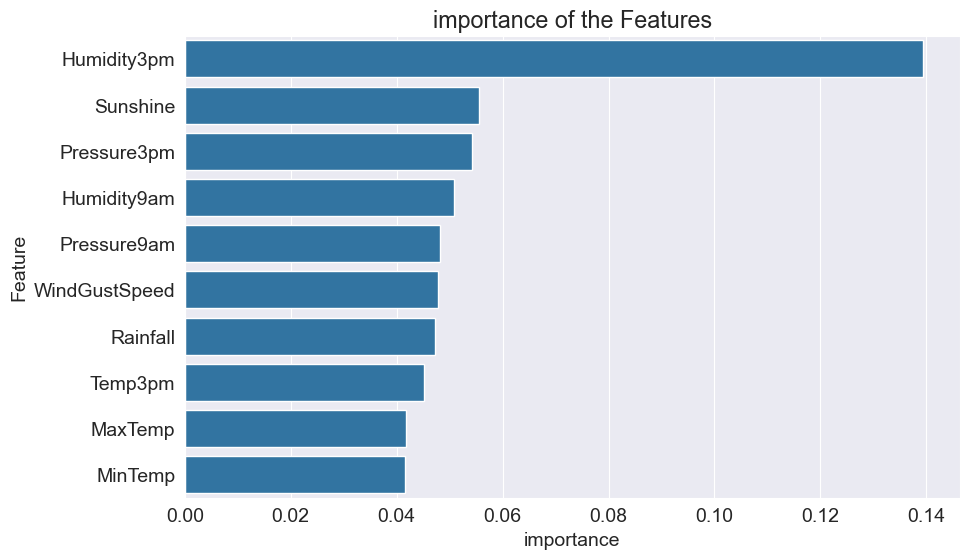

In [172]:
plt.title('importance of the Features')
sns.barplot(data = importance_df.head(10), x = 'importance', y='Feature');
          

In [174]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the 

In [176]:
base_model = RandomForestClassifier(n_jobs=-1,random_state=42).fit(X_train,train_target)

In [186]:
def test_params(**params):    
    model = RandomForestClassifier(random_state = 42, n_jobs = -1, **params).fit(X_train, train_target)
    return model.score(X_train, train_target), model.score(X_val, val_target)

In [180]:
test_params(max_depth=5, max_leaf_nodes = 1024, n_estimators = 10)

(0.830939103729745, 0.8321629621031861)

In [182]:
test_params(max_depth = 25)

(0.9775629369216471, 0.8544483779235099)

In [183]:
def tree_error(md):
    model = RandomForestClassifier(random_state = 42, n_jobs = -1, max_depth = md).fit(X_train,train_target)
    train_error = 1-model.score(X_train, train_target)
    val_error = 1-model.score(X_val, val_target)
    return {'max_depth':md, 'Training Error':train_error, 'Validation_error':val_error}

In [193]:
errors_df = pd.DataFrame([tree_error(md) for md in range(5,50)])

In [195]:
errors_df

max_depth  Training Error  Validation_error
0           5        0.179032          0.174917
1           6        0.171425          0.168708
2           7        0.163687          0.164007
3           8        0.158070          0.159944
4           9        0.151917          0.157043
5          10        0.145513          0.155476
6          11        0.138572          0.154141
7          12        0.130965          0.153328
8          13        0.121894          0.150601
9          14        0.113014          0.149672
10         15        0.103588          0.147873
11         16        0.093304          0.146944
12         17        0.082929          0.146712
13         18        0.073706          0.145900
14         19        0.064644          0.146132
15         20        0.056916          0.146538
16         21        0.048046          0.144449
17         22        0.041237          0.145203
18         23        0.034105          0.145319
19         24        0.028458          0.146074
20         25        0.022437          0.145552
21         26        0.018346          0.143230
22         27        0.014567          0.143695
23         28        0.011648          0.145261
24         29        0.008930          0.145494
25         30        0.006506          0.144217
26         31        0.005132          0.143114
27         32        0.003435          0.144449
28         33        0.002425          0.142592
29         34        0.001930          0.142128
30         35        0.001424          0.143753
31         36        0.000990          0.145087
32         37        0.000667          0.142824
33         38        0.000556          0.143404
34         39        0.000374          0.145145
35         40        0.000293          0.142708
36         41        0.000232          0.143636
37         42        0.000152          0.143346
38         43        0.000131          0.143114
39         44        0.000121          0.143172
40         45        0.000081          0.143869
41         46        0.000101          0.142302
42         47        0.000081          0.144971
43         48        0.000071          0.144855
44         49        0.000071          0.143172

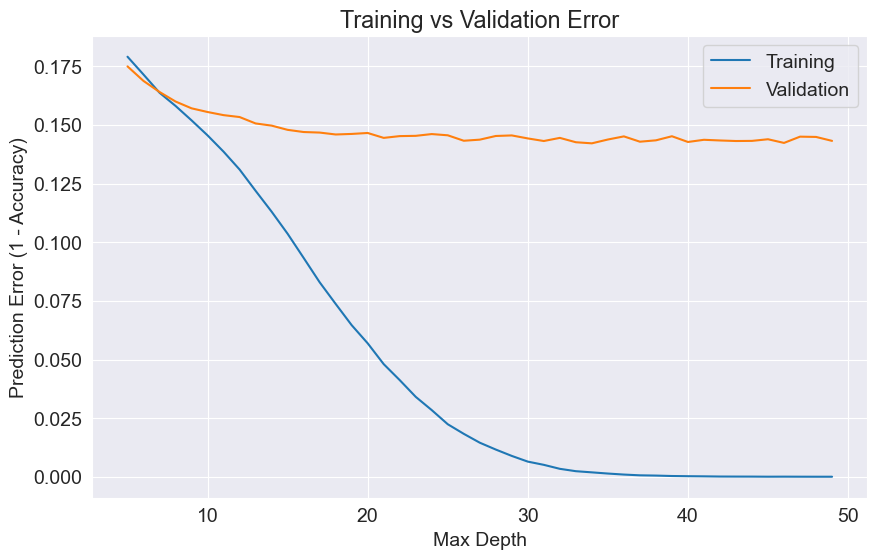

In [201]:
plt.figure()
plt.plot(errors_df['max_depth'], errors_df['Training Error'])
plt.plot(errors_df['max_depth'], errors_df['Validation_error']) 
plt.title('Training vs Validation Error')
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [190]:
test_params(max_features = 'log2')

(0.9999494888269285, 0.8540421333642852)

In [192]:
test_params(max_features = 'sqrt')

(0.9999595910615429, 0.8553769369160235)

In [194]:
test_params(max_features = 3)

(0.9999393865923142, 0.8527653647495792)

In [198]:
test_params(max_features = 20)

(0.9999595910615429, 0.8547965875457025)

In [204]:
test_params(min_samples_split = 100, min_samples_leaf = 60)

(0.8489311835778074, 0.8448145783761825)

In [208]:
test_params(min_impurity_decrease=1e-6)

(0.9885541681820018, 0.8560153212233764)

In [210]:
test_params(bootstrap = False)

(0.9999797955307714, 0.8586268933898207)

In [216]:
test_params(max_samples = 0.9)

(0.9997575463692568, 0.8560153212233764)

In [224]:
train_target.value_counts()/len(train_target)

RainTomorrow
No     0.774892
Yes    0.225108
Name: count, dtype: float64

In [226]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [232]:
test_params(class_weight = 'balanced')

(0.9999595910615429, 0.8552608670419592)

In [238]:
test_params(class_weight = {'No':1, 'Yes':2.5})

(0.9999595910615429, 0.8553769369160235)